## 8-7. 프로젝트: 한영 번역기 만들기
라이브러리 버전을 확인해 봅니다

---
사용할 라이브러리 버전을 둘러봅시다.

In [ ]:
import pandas
import tensorflow
import matplotlib

print(pandas.__version__)
print(tensorflow.__version__)
print(matplotlib.__version__)

1.3.5
2.8.0
3.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


mecab 설치

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [82.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [951 kB]
Hit:14 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1361k      0  0:00:01  0:00:01 --:--:-- 3714k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
!sudo apt-get install -y fonts-nanum # 나눔 글꼴체
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 95 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,693 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 157071 files and d

Step 1. 데이터 다운로드

---
아래 링크에서 ```korean-english-park.train.tar.gz``` 를 다운로드받아 한영 병렬 데이터를 확보합니다.

- [jungyeul/korean-parallel-corpora](https://github.com/jungyeul/korean-parallel-corpora/tree/master/korean-english-news-v1)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

print("완료!")

완료!


In [ ]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

print(tf.__version__)

2.8.0


In [ ]:
path_to_zip = tf.keras.utils.get_file(
    origin='https://github.com/jungyeul/korean-parallel-corpora/raw/212282332f962cbc8665537e6cd6aa907ef6bb1f/korean-english-news-v1/korean-english-park.train.tar.gz',
    extract=True,
    cache_dir='/content/drive/MyDrive/Colab/Going_Deeper/Node.08')

In [ ]:
path_to_file_en = os.path.dirname(path_to_zip) + "/korean-english-park.train.en" #/korean-english-park.train.en
path_to_file_ko = os.path.dirname(path_to_zip) + "/korean-english-park.train.ko"

In [ ]:
with open(path_to_file_en, "r") as f:
    raw_train_en = f.read().splitlines()

print("Data Size:", len(raw_train_en))
print("Example:")

for sen in raw_train_en[500:1000][::20]: print(">>", sen)

Data Size: 94123
Example:
>> "This is a real discovery."
>> one recent episode, aired not long after students returned home from schools, included a bondage scene between a woman in leather and her daughter's boyfriend.
>> But that game may get more difficult.
>> Heartland is so bright that the Federal Aviation Administration is concerned that planes with faulty instruments might mistake it for nearby MacArthur Airport.
>> Her workday begins at 2 a.m. at her home office, chats with her Asian clients, and settles down to four hours of trading.
>> A leader is Huntington Bankshares in Columbus, Ohio.
>> Our internal clocks adapted us perfectly to a world where we slept by night and hunted by day."
>> But how long will it hold up?
>> As the name implies, it's already become immune to Vancomycin and every other antibiotic.
>> A network is a group of computers joined to a host computer or server by modems or by cables.
>> They know all the different motives / that influence a consumer's purc

In [ ]:
with open(path_to_file_ko, "r") as f:
    raw_train_ko = f.read().splitlines()

print("Data Size:", len(raw_train_ko))
print("Example:")

for sen in raw_train_ko[500:1000][::20]: print(">>", sen)

Data Size: 94123
Example:
>> "이것은 대단한 발견입니다."
>> 학생들이 수업을 마치고 막 집에 돌아 오는 시간에 방송된 최근의 한 이야기에서는 가죽 옷을 입은 여인이 딸의 남자친구와 뒤엉켜 있는 장면이 포함되어 있었다.
>> 하지만 게임은 더욱 더 힘들어질 지도 모른다.
>> 하트랜드는 아주 환하게 밝혀져 있어서 연방 항공관리국은 계기 고장의 비행기들이 골프장을 인근 맥아더 공항으로 오인하지 않을까 우려하고 있다.
>> 그녀의 평일 근무는 오전 2시에 자기집 사무실에서 시작되어, 아시아 고객들과 떠들어 대다가, 본격적으로 4시간 동안의 거래를 착수하게 된다.
>> 앞서가고 있는 은행 중의 하나가 오하이오 주 콜럼버스에 있는 헌팅턴 뱅크쉐어즈이다.
>> 우리 내부의 신체 시계는 밤 에 자고, 낮 에 사냥하는 그러한 세계에 최적의 상태로 적응되어 있습니다."
>> 하지만 얼마나 오래 그 효과가 지속될 것인가?
>> 그 이름이 뜻하는 바와 같이 이 세균은 이미 밴코마이신과 모든 다른 항생물질에 대해 면역성을 갖게 되었다.
>> 하나의 통신망은 모뎀이나 케이블에 의해 호스트 컴퓨터나 서버에 접속되어 있는 일단의 컴퓨터들을 말한다.
>> 그들은 소비자들의 구매에 영향을 미치는 모든 다른 동기들에 대해 알고 있다.
>> 사실 ETC에 의한 계산은 동전이 통행요금 징수대에 던져지는 것만큼이나 익명이 되어야 한다고 사생활에 대한 보장을 주장하는 사람들은 말한다.
>> 나이키는 미국 리복의 20.4%, 독일의 가족회사인 아디다스의 10.8%에 비교해 세계 시장의 23.8%를 점유하고 있다.
>> 누군가가 컴퓨터 통신망에 접속하여 하루에 18시간을 보낸다면 무엇이라고 말하겠는가?
>> "나의 하루는 전부 이 일을 중심으로 계획이 됩니다.
>> 그런데 대부분의 여성 군인들은 배제되는 것을 원하지 않는다.
>> 인도네시아의 산업 발전은 아주 급속히 이루어졌기 때문에, 산업 전반에 거쳐 환경문제가 심각한 정도로 전면에 나타나게 되었다.
>> 간이 음식점들은 


Step 2. 데이터 정제

---


In [ ]:
from konlpy.tag import Mecab

 1) 중복제거 ```set``` (데이터의 병렬 쌍이 흐트러지지 않게 주의!)
- 중복을 제거한 데이터를 ```cleaned_corpus```에 저장

In [ ]:
cleaned_corpus = list(set(zip(raw_train_ko, raw_train_en)))
print(cleaned_corpus[0:3], '\n')
print(len(cleaned_corpus))

[('그는 “개막식 불참이 이미 수주 전에 결정됐다”며 “도덕적인 입장에서 내려진 것은 아니다”라고 전했다.', 'She said the decision was made weeks ago and was not a stand on principle.'), ('로버트 게이츠 국방장관은 최소한 새로운 오바마 행정부가 시작하는 임시기간 동안 각료로 계속 머무를 것이라는 풍문이 돌고 있다.', 'Scowcroft is very close to current Defense Secretary Robert Gates, who is rumored to be in the running to stay in the Cabinet for at least an interim period at the start of the new Obama administration.'), ('function pop_open(url){win = window.open(url,\'movie\',"scrollbars=no,width=770,height=570,left=50,top=50");}', "cnnVideo('play','/video/showbiz/2007/02/25/hammer.oscar.nominees.origins.nbc','2007/03/15');")] 

78968


 2) 한글에 적용할 수 있는 정규식을 추가하여 함수 재정의 하기

In [ ]:
# 한글 토큰화는 KoNLPY의 mecab 활용
def preprocess_sentence_ko(sentence, s_token=False, e_token=False):
    mecab = Mecab()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^ㄱ-ㅎ|가-힣?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    sentence = mecab.morphs(sentence) # mecab으로 토큰화(형태소도 추출)
    
    return sentence

In [ ]:
# 영문엔 <start> 토큰과 <end> 토큰을 추가하고 split() 함수를 이용하여 토큰화
def preprocess_sentence_en(sentence, s_token=True, e_token=True):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    sentence = sentence.split() #split()함수로 토큰화
    
    return sentence

3) 모든 데이터를 사용할 경우 학습에 굉장히 오랜 시간이 걸린다. ```cleaned_corpus```로부터 토큰의 길이가 40 이하인 데이터를 선별하여 ```eng_corpus```와 ```kor_corpus```를 각각 구축

In [ ]:
def preprocessing(cleaned_corpus):
    kor_corpus = []
    eng_corpus = []
    for sentence in cleaned_corpus:
        sentence_ko = preprocess_sentence_ko(sentence[0])
        sentence_en = preprocess_sentence_en(sentence[1])
        if len(sentence_ko) <= 20 and len(sentence_en) <= 20: # 길이 40 이하만 포함
            kor_corpus.append(sentence_ko)
            eng_corpus.append(sentence_en)
    
    return kor_corpus, eng_corpus

In [ ]:
kor_corpus, eng_corpus = preprocessing(cleaned_corpus)

In [ ]:
print(len(kor_corpus))

15553


In [ ]:
print(len(eng_corpus))

15553


In [ ]:
print(kor_corpus[777])

['카본', '나노', '튜브', '는', '경량', '에', '철강', '의', '케이블', '보다', '배', '이상', '강한', '장력', '을', '가지', '고', '있', '다', '.']


In [ ]:
print(eng_corpus[777])

['<start>', 'it', 'is', 'lightweight', 'and', 'has', 'a', 'tensile', 'strength', 'times', 'stronger', 'than', 'that', 'of', 'a', 'steel', 'cable', '.', '<end>']



    
Step 3. 데이터 토큰화

---
앞서 정의한 ```tokenize()``` 함수를 사용해 데이터를 텐서로 변환하고 각각의 ```tokenizer```를 얻으세요! 단어의 수는 실험을 통해 적당한 값을 맞춰주도록 합니다! (최소 10,000 이상!)

❗ 주의: 난이도에 비해 데이터가 많지 않아 훈련 데이터와 검증 데이터를 따로 나누지는 않습니다.


In [ ]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<unk>')
    tokenizer.fit_on_texts(corpus)
    #oov_token : 값이 지정된 경우, text_to_sequence 호출 과정에서 word_index에 추가되어 out-of-vocabulary words를 대체한다.
    #fit_on_texts() 메서드는 문자 데이터를 입력받아서 리스트의 형태로 변환한다. 
    
    tensor = tokenizer.texts_to_sequences(corpus)
    #texts_to_sequences() 메서드는 텍스트 안의 단어들을 숫자의 시퀀스의 형태로 변환한다.

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')
    #pad_sequences() 함수에 이 시퀀스를 입력하면 숫자 0을 이용해서 같은 길이의 시퀀스로 변환한다.
    return tensor, tokenizer

In [ ]:
# 토큰화하기
enc_tensor, enc_tokenizer = tokenize(kor_corpus)
dec_tensor, dec_tokenizer = tokenize(eng_corpus)

In [ ]:
# Encoder, Decoder 텐서 형상 확인하기
print(enc_tensor.shape, dec_tensor.shape)

(15553, 20) (15553, 20)


In [ ]:
# Encoder 텐서가 올바르게 출력되나요?
print(enc_tensor[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 11 11 11 11 11 11]


In [ ]:
# Decoder 텐서가 올바르게 출력되나요?
print(dec_tensor[0])

[   0    0    0    2 5911  574    6  465 3883 8458    4 1338    4 5912
    4 4642    4 1641    6    3]



Step 4. 모델 설계

---
한국어를 영어로 잘 번역해 줄 멋진 **Attention 기반 Seq2seq 모델을 설계**하세요! 앞서 만든 모델에 ```Dropout``` 모듈을 추가하면 성능이 더 좋아집니다! ```Embedding Size```와 ```Hidden Size```는 실험을 통해 적당한 값을 맞춰 주도록 합니다!

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units, return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        self.attention = BahdanauAttention(self.dec_units)
        
    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)
        
        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)
        
        return out, h_dec, attn

In [ ]:
BATCH_SIZE = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units = 1024  
embedding_dim = 1024

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 30

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                    sample_state, sample_output)

print('Decoder Output :', sample_logits.shape)
print('Decoder Hidden State :', h_dec.shape)
print('Attention :', attn.shape)

Encoder Output: (64, 30, 1024)
Decoder Output : (64, 15519)
Decoder Hidden State : (64, 1024)
Attention : (64, 30, 1)


## Optimizer & Loss
앞에 연습과정에서 살펴본 모델 설계에서의 Encoder-Decoder 구조의 경우 입출력이 단순하지 않아 학습 과정을 직접 정의해줘야 했습니다

- ```SparseCategoricalCrossentropy()``` 함수는 **모델이 출력한 확률 분포**와  **정수 인덱스 답안**을 비교해 Cross Entropy값을 구해준다. 
```
CategoricalCrossentropy()라면 [ 0.1, 0.2, 0.7 ] 과 One-hot 인코딩된 라벨 [0, 0, 1] 을 비교하여 점수를 채점하겠지만,
 SparseCategoricalCrossentropy() 함수라면 [ 0.1, 0.2, 0.7 ] 과 정수 인덱스 답안 2 를 비교하여 점수를 채점하는 거죠. 
```
- ```from_logits``` 는 확률 분포가 Softmax를 거쳐서 들어오는지, 모델의 출력값 그대로 들어오는지를 결정한다.

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss += mask
    
    return tf.reduce_mean(loss)

train_step

In [ ]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0
    
    with tf.GradientTape() as tape:
        enc_out = encoder(src) # context vector 생성
        h_dec = enc_out[:, -1] # t=0일 때 Decoder의 Hidden State는 Encoder의 Final State로 정의
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1) # Decoder에 입력으로 전달할 <start>토큰 문장 생성
        
        for t in range(1, tgt.shape[1]): # 문장과 enc_out, Hidden State를 기반으로 다음 단어(t=1)를 예측
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)
            
            loss += loss_function(tgt[:, t], pred) # 예측된 단어와 정답 간의 loss를  구함
            dec_src = tf.expand_dims(tgt[:, t], 1) # t=1의 정답 단어를 다음 입력으로 사용
            
    batch_loss = (loss / int(tgt.shape[1]))
    
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss



Step 5. 훈련하기

---


In [ ]:
print('시간 좀 걸릴거에요~ 화이팅..👍👍')

from tqdm import tqdm
import random

EPOCHS = 15

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE)) # 각 배치의 시작 인덱스를 idx_list 배열에 저장
    random.shuffle(idx_list) # 학습이 원활하게 이루어질 수 있도록 인덱스를 섞음
    t = tqdm(idx_list)
    
    # 각 미니배치를 train_step() 함수에서 학습합니다. train_step()은 학습에 필요한 것은 모두 가져가 Loss를 계산한 후 반환하는 함수입니다.
    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_tensor[idx: idx+BATCH_SIZE],
                                dec_tensor[idx: idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
        
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1)) # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1))) # tqdm

시간 좀 걸릴거에요~ 화이팅..👍👍


Epoch 15: 100%|██████████| 244/244 [00:53<00:00,  4.59it/s, Loss 1.2795]


### 모델 평가


번역기 모델의 성능이 어떤지 살펴보자 😎

In [ ]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_tensor.shape[-1], enc_tensor.shape[-1]))
    
    sentence = preprocess_sentence_ko(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_tensor.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_tensor.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention

In [ ]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 13}    # font의 크기는 마음대로 조정 가능!

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [ ]:
def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input : %s' % (sentence))
    print('Predicted translation : {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence)]
    plot_attention(attention, sentence, result.split(' '))

In [ ]:
translate("안녕하세요", encoder, decoder)

KeyError: ignored

In [ ]:
translate("우리 사이 승률 백프로", encoder, decoder)

KeyError: ignored

Input : ['봄', '여름', '가을', '겨울']
Predicted translation : spring , the long time it is the worst hot summer hot beach season . <end> 


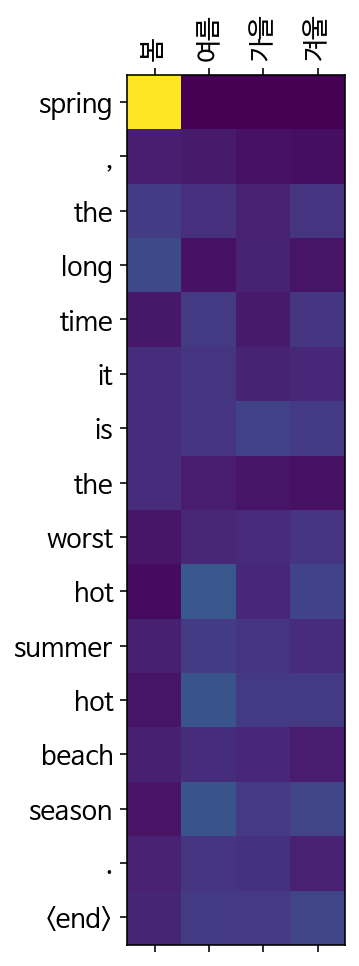

In [ ]:
translate("봄 여름 가을 겨울", encoder, decoder)

>```단어장 15000```,
```batch 64```,
```units 1024```,
```embedding_dim 512```,
```epoch 10```


>```단어장 20000```,
```batch 128```,
```units 1024```,
```embedding_dim 1024```,
```epoch 20```

>```단어장 10000```,
```batch 64```,
```units 1024```,
```embedding_dim 1024```,
```epoch 15```

>```단어장 10000```,
```batch 64```,
```units 1024```,
```embedding_dim 1024```,
```epoch 15```
```padding='pre'```



||1|2|3|4(padding='pre')|
|---|---|---|---|---|
|안녕하세요|and merry christmas ! <end> |we don t disqualify us , getting a protectionist . <end> |what it cause it cause... |error|
|우리 사이 승률 백프로|we deem the next year . <end> |all we have been going into this century . <end> |all the <unk> <unk> <unk> <unk> . <end> |error|
|봄 여름 가을 겨울|spring break <end> |spring also be even in online summer vacation this summer... |both side checks spring <end> |spring , the long time it is the worst hot summer hot beach season . <end> |
|도망가봤자 잡혀옵니다|the jirga opened in the scene ... |following former president obama s next door <end> |the <unk> singer yoo seung ! <end> |error|
|외로워도 슬퍼도 나는 안울어||even when he s going to be honest . <end> |<unk> bought and good <unk> . <end> |error|


뜬금 성탄절

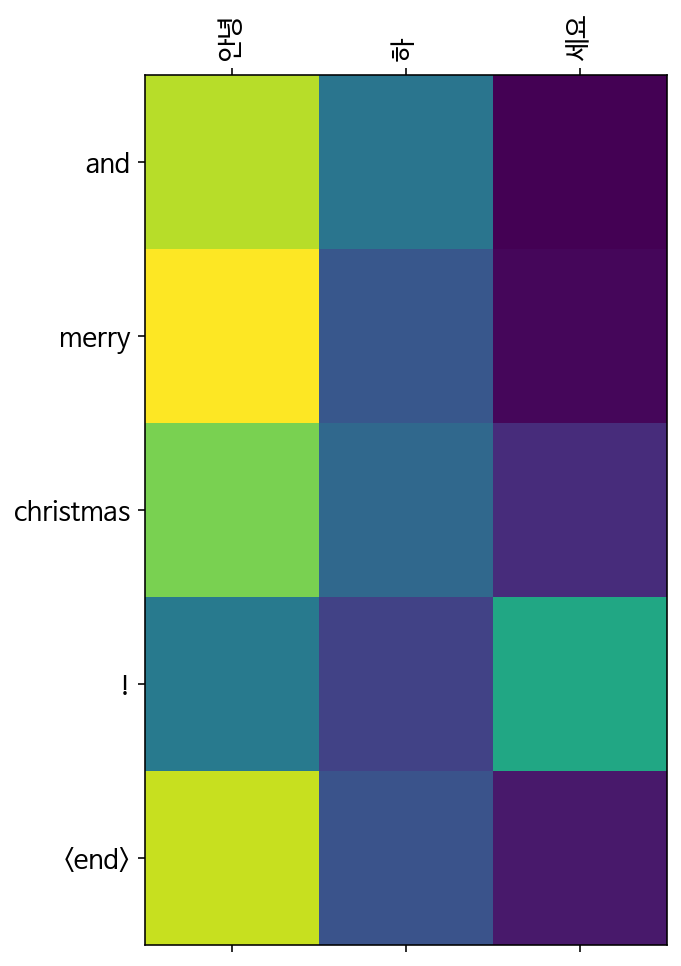

## 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|상세기준|
|:-----|:------|
|1. 번역기 모델 학습에 필요한 텍스트 데이터 전처리가 한국어 포함하여 잘 이루어졌다.|구두점, 대소문자, 띄어쓰기, 한글 형태소분석 등 번역기 모델에 요구되는 전처리가 정상적으로 진행되었다.|
|2. Attentional Seq2seq 모델이 정상적으로 구동된다.|seq2seq 모델 훈련 과정에서 training loss가 안정적으로 떨어지면서 학습이 진행됨이 확인되었다.|
|3. 테스트 결과 의미가 통하는 수준의 번역문이 생성되었다.|테스트용 디코더 모델이 정상적으로 만들어져서, 정답과 어느 정도 유사한 영어 번역이 진행됨을 확인하였다.|

# 회고

단어장의 크기를 15000, 20000으로 했지만 크게 잘 나오지 않았다.

지난 프로젝트에서 단어장 크기를 조절해가며 모델 성능을 비교해봤을 때, 단어장의 크기가 적어도 비교적 잘 나왔었다. 그래서 10000으로 줄여보았다. 그래도 여전히 안녕하세요를 hi, hello 같은 기초 단어를 왜 번역 못하는지 의문이다.

마지막 시도는 전전 프로젝트에 한국어 패딩은 post 대신에 pre가 accuracy가 더 높게 나왔던 것이 검증되었기 때문에 패딩을 바꾸어 보았다.
(그 결과 error, 왜일까?)

데이터 난이도가 높단 설명이 있었는데 이렇게 난이도가 높을 줄
하나도 제대로 나온게 없다😂😂